In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from skimage.feature import graycomatrix, graycoprops
from image_extractor import init_lut,apply_lut, hsv_filter, histogram_analysis, statistic_analysis, geometry_analysis, linear_fn, curved, CLAHE, seperate_chanel, hsv_contour_extract, select_feature

# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (99).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (5).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (32).JPG'


plt.rcParams['figure.dpi'] = 102

image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
# im_shape = np.shape(image)
lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)

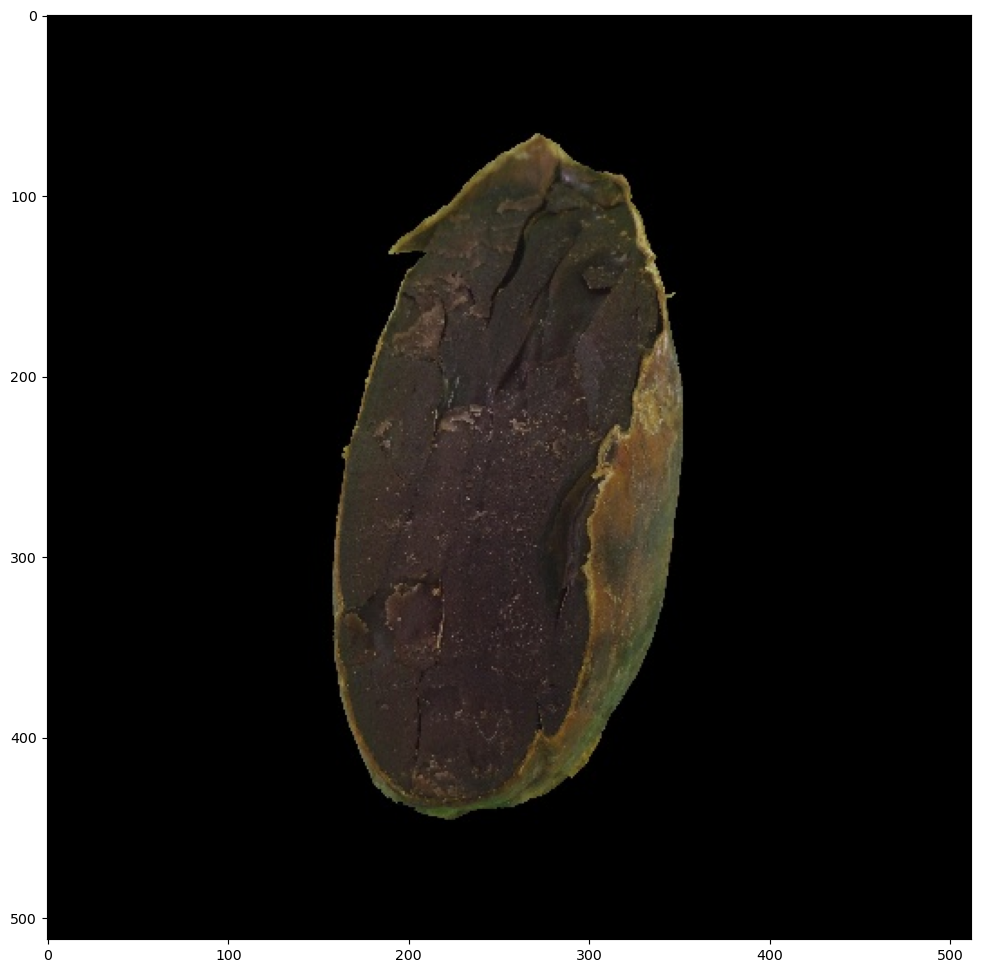

In [72]:
origin_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(origin_rgb)
plt.show()

In [73]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv = apply_lut(image_hsv, 2, lut2)   #tang brightness
image_hsv = apply_lut(image_hsv, 1, lut1)   #tang Sat
image_hsv = hsv_filter(image_hsv)

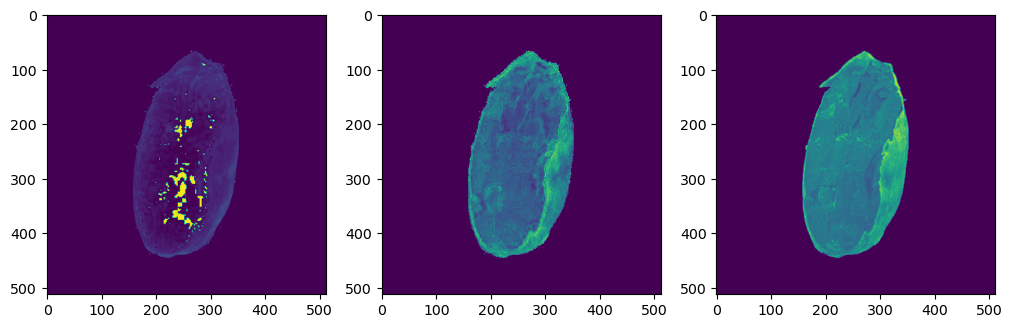

In [74]:
plt.rcParams["figure.figsize"] = (12,6)
h,s,v = seperate_chanel(image_hsv, plot=True)

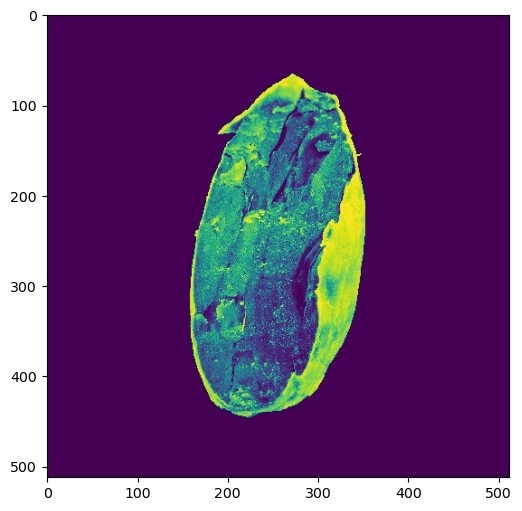

In [75]:
plt.rcParams["figure.figsize"] = (6,6)
v = CLAHE(v, grey=True)
plt.imshow(v)
plt.show()

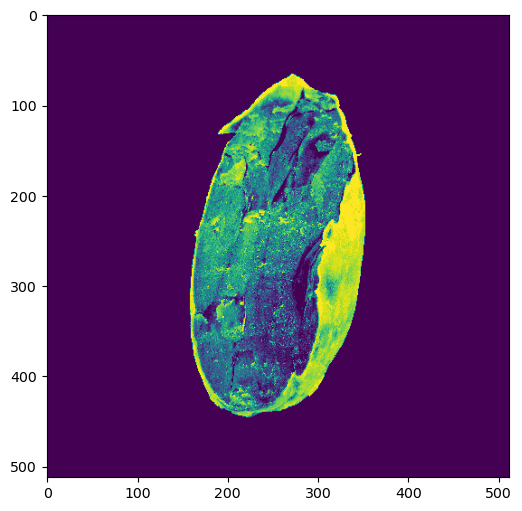

In [76]:
plt.rcParams["figure.figsize"] = (6,6)
bins = np.linspace(0, 255+1, 16+1)
digitize = np.digitize(v, bins) - 1
plt.imshow(digitize)
plt.show()

(16, 16, 4, 4)


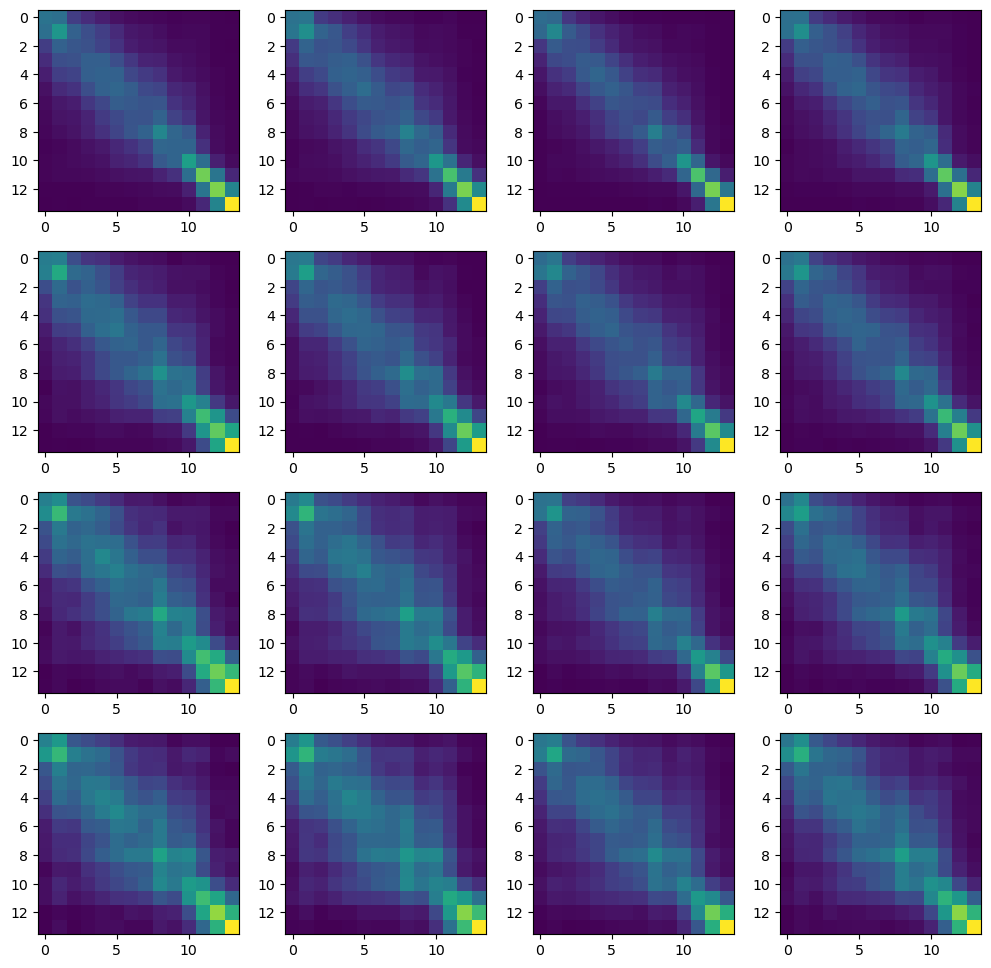

In [77]:
plt.rcParams["figure.figsize"] = (12,12)

glcm = graycomatrix(digitize, [1,3,5,7], [0, np.pi/4, np.pi/2, 3*np.pi/4], 16, True, False)
# glcm_cons = graycoprops(glcm, 'contrast')
# glcm_dissimilarity = graycoprops(glcm, 'dissimilarity')
# glcm_energy = graycoprops(glcm, 'energy')
# glcm_correlation = graycoprops(glcm, 'correlation')
print(np.shape(glcm))
for i in range(4):
    for j in range(4):
        mat = glcm[1:15,1:15,i,j]
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(mat)
plt.show()

In [78]:
print(glcm[:,:,0,0])

[[413522    942    740    333    247    215    124     92     75     73
      58     86    116    160    242    309]
 [   942   1306   1252    622    436    299    169    115     89     75
      47     60     57     27     23     19]
 [   740   1252   1786   1067    825    643    411    227    188    141
      79     92     81     36     34     18]
 [   333    622   1067    912    851    695    511    289    221    191
     109    107     88     37     13     24]
 [   247    436    825    851   1042   1041    823    562    349    321
     181    141    100     39     27     23]
 [   215    299    643    695   1041   1078   1063    734    586    490
     246    181    129     55     33     20]
 [   124    169    411    511    823   1063   1126   1009    759    705
     389    328    166     54     33     30]
 [    92    115    227    289    562    734   1009    952    895    909
     502    381    192     69     39     33]
 [    75     89    188    221    349    586    759    895    882

(8,)
(230, 354, 46, 39, 370.5, 190.72330236434937, 29.016273498535156, 50.73995590209961, 122.8896255493164, 1.736161729545724, 851.0, 25.26865577697754, 0.43537015276145713, 0.20652173913043478, 5.522680508593631)
[[40.02341137123746 64.77647714604237 63.96042363433668]
 [44.0 35.0 34.0]
 [17.363586723166296 75.43581870706025 75.73864563638064]
 [-1.230261561968285 2.1051418725407847 2.107070707169134]
 [1.8107241958790734 2.4862477895325847 2.4922133512559634]]
(240, 336, 16, 16, 90.0, 60.14213538169861, 11.582433700561523, 20.395231246948242, 45.46553039550781, 1.7391242537341602, 154.5, 10.259242057800293, 0.5825242718446602, 0.3515625, 0.5)
[[33.8515625 96.765625 97.28125]
 [43.0 36.0 36.0]
 [22.44228709378792 99.44299776214295 99.11889275996168]
 [-0.5404856396676057 0.9563044816250315 0.9562898650466612]
 [-0.8398902372238939 -1.0636766172270233 -1.0636446847896415]]
(276, 332, 11, 20, 79.5, 53.899494767189026, 12.763847351074219, 21.6552677154541, 173.4446258544922, 1.722982693

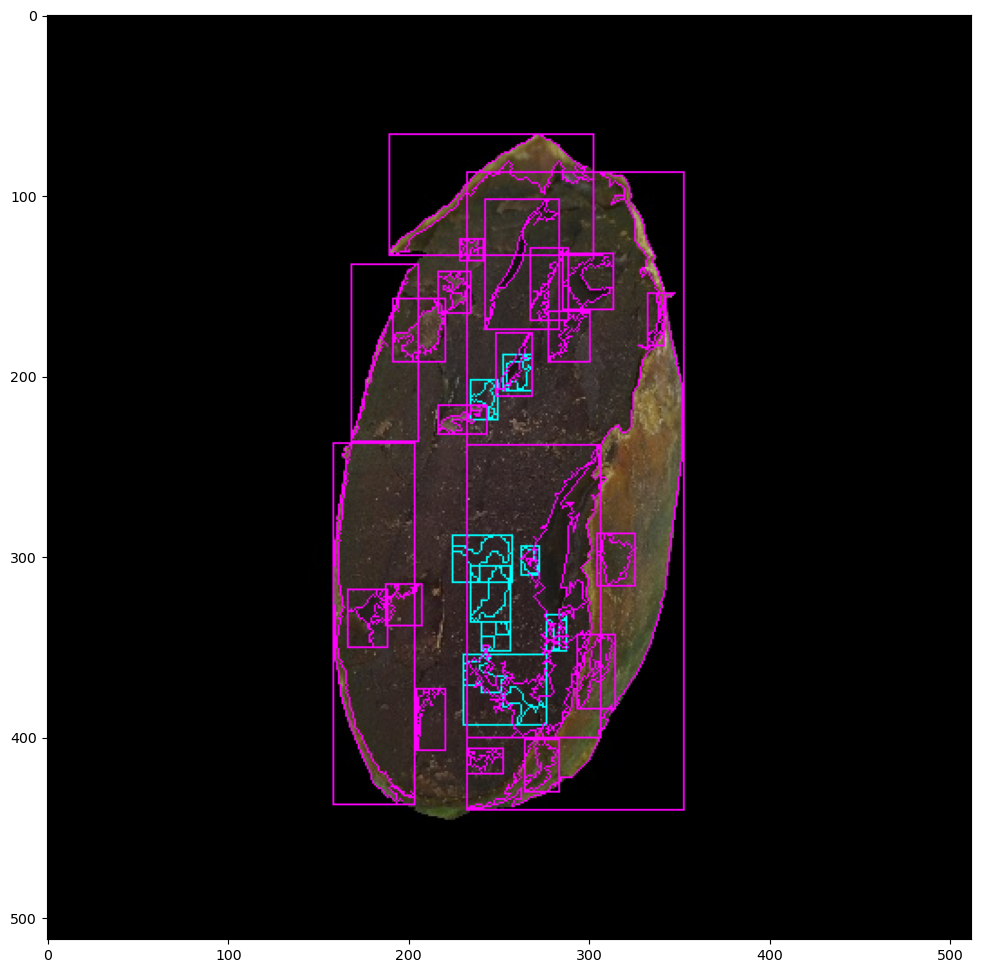

In [79]:
ctH, ctV = hsv_contour_extract(image_hsv)
print(np.shape(ctH))
for cnt in ctH:
    cv2.drawContours(origin_rgb, [cnt], -1, (0, 255, 255), 1)
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(0,255,255), 1)
    print(geometry_analysis(cnt))
    print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))

for cnt in ctV:
    cv2.drawContours(origin_rgb, [cnt], -1, (255, 0, 255), 1)
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(255,0,255), 1)
    print(geometry_analysis(cnt))
    print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))
plt.imshow(origin_rgb)
plt.show()